# Практическая работа №2
## Тема: применение методов линейного программирования для решения практической задачи
Вариант 36 (473)

Выполнил студент гр.1374 Дюков Николай.

Преподаватель: Пономарев Андрей Васильевич

## ***Цель работы***
Решить практическую задачу с помощью применения методов линейного программирования

**Актуальное индивидуальное задание**

Часть прибыли, получаемой от работы 1-го и 2-го цехов в течение одного года, планируется использовать для приобретения оборудования для нового третьего цеха. Доля средств, отчисляемая ежеквартально из прибыли от работы 1-го и 2-го цехов на приобретение оборудования для 3-го цеха, составляет 75 %. Оборудование нового цеха предполагается разместить на площади 180 кв.м. Возможно приобретение пяти видов однородного оборудования, характеристики которого представлены в таблице 1.

Таблица 1: Характеристики оборудования

|Вид|Стоимость (млн.руб)|Требуемая площадь (кв.м)|Производительность оборудования (шт.)|
|----|----|----|----|
|Тип 1| 39| 23| 1400|
|Тип 2| 38| 21| 900|
|Тип 3| 29| 27| 1000|
|Тип 4| 57| 8| 900|
|Тип 5| 49| 20| 1600|

Необходимо обеспечить максимальную производительность цеха и провести исследование полученного решения.

1. Имея в виду необходимость получения ЦЕЛОЧИСЛЕННОГО решения, найти оптимальный план приобретения оборудования для третьего цеха.
2. Исследовать полученное решение на чувствительность к изменению стоимостного ограничения, связанному с возможным изменением соотношения цен и средств:
- выяснить влияние изменения (увеличения, уменьшения) количества средств на переход роли активного ограничения (либо по площади, либо по стоимости), и вследствие этого — на выбор оптимального типа оборудования;
- выяснить границы изменения количества средств, в пределах которых оптимальным
является выбор 2-х и более типов оборудования.



## ***Постановка задачи***
Необходимо разработать оптимальный план приобретения оборудования для третьего цеха, используя часть прибыли от работы 1-го и 2-го цехов. Доля средств отчисляется ежеквартально на покупку оборудования для третьего цеха. Оборудование третьего цеха должно быть установлено на площади 180 кв.м. Также необходимо исследовать полученное решение на чувствительность к изменениям стоимостного ограничения и количества средств.

## ***Выполнение работы***

**Формализация задачи**

- $x_i$: количество единиц оборудования i, приобретаемого для 3-го цеха, где i = 1,2,3,4,5 (шт.).
- $y_1$ - прибыль 1-го цеха (млн.руб)
- $y_2$ - прибыль 2-го цеха (млн.руб)
- $p_1$: количество средств, вложенных в 1-й цех за квартал (в единицах)
- $p_2$: количество средств, вложенных во 2-й цех за квартал (в единицах)

Функции дохода:

- Для 1-го цеха: $𝑦_1 = 60 + 1.3 \cdot p_1^\frac{2}{3}$(млн.руб)
- Для 2-го цеха: $𝑦_2 = 70 + 0.8 \cdot p_2^\frac{2}{3}$(млн.руб)


**Целевая функция**

Мы хотим максимизировать производительность третьего цеха. Поэтому целевая функция будет выглядеть следующим образом:

$1400 \cdot x_1 + 900 \cdot x_2 + 1000 \cdot x_3 + 900 \cdot x_4 + 1600 \cdot x_5 \to max$

**Ограничения**


1. Стоимостное ограничение:
   - Общая стоимость оборудования не должна превышать доступное количество средств, которое равно 75% от прибыли от работы 1-го и 2-го цехов за год.

   $39 \cdot x_1 + 38 \cdot x_2 + 29 \cdot x_3 + 57 \cdot x_4 + 49 \cdot x_5 \leq 0.75 \cdot (y_1 + y_2)$

2. Ограничение по площади:
   - Общая площадь оборудования 180 кв.м.

   $23 \cdot x_1 + 21 \cdot x_2 + 27 \cdot x_3 + 8 \cdot x_4 + 20 \cdot x_5 \leq 180$

3. Целочисленность переменных:
   - Так как нельзя приобрести дробное количество оборудования, переменные должны быть целочисленными и количетсво оборудования не может быть отрицательным:

   $x_i \in \mathbb{Z}^+$ и $x_i ≥ 0$

**Решение задачи оптимизации**

Для приобретения оборудования третьего цеха с учетом ограничений по стоимости, площади и неотрицательности переменных.

- Сначала мы вычисляем общее количество доступных средств за каждый квартал, используя данные о количестве средств, выделенных на развитие цехов и о доходах от их работы. (данные по кварталам взяли из задания №1)

```
# result = 0
quarters = [
    {"ceh1": 133, "ceh2": 52},
    {"ceh1": 91, "ceh2": 36},
    {"ceh1": 62, "ceh2": 25},
    {"ceh1": 43, "ceh2": 17}
]

for idx, quarter in enumerate(quarters, start=1):
    total = 0.75 * ((60 + 1.3 * (quarter["ceh1"]) ** (2/3)) + (70 + 0.8 * (quarter["ceh2"]) ** (2/3)))
    result += total
```

- Создаем экземпляр задачи линейного программирования с помощью функции LpProblem, указывая, что мы хотим максимизировать производительность третьего цеха (LpMaximize).

```
# prob = LpProblem("Optimal_equipment", LpMaximize)
```

- Мы создаем переменные решения x1, x2, x3, x4 и x5, которые представляют количество единиц оборудования каждого типа.


```
# x1 = LpVariable("x1", lowBound=0, cat='Integer')
x2 = LpVariable("x2", lowBound=0, cat='Integer')
x3 = LpVariable("x3", lowBound=0, cat='Integer')
x4 = LpVariable("x4", lowBound=0, cat='Integer')
x5 = LpVariable("x5", lowBound=0, cat='Integer')
```

 lowBound=0: означает, что переменные не могут принимать значения меньше нуля.

 cat='Integer' указывает, что переменные должны принимать только целочисленные значения.

- Определяем целевую функцию как сумму произведений производительности каждого типа оборудования на их количество.

```
# prob += 1400*x1 + 900*x2 + 1000*x3 + 900*x4 + 1600*x5, "Total Productivity"
```

- Добавляем ограничения: ограничение по стоимости и ограничение по площади, чтобы общая стоимость оборудования не превышала доступные средства и общая площадь оборудования равнялась 180 кв.м.

```
# prob += 39*x1 + 38*x2 + 29*x3 + 57*x4 + 49*x5 <= int(result), "Cost Constraint"
prob += 23*x1 + 21*x2 + 27*x3 + 8*x4 + 20*x5 <= 180, "Area Constraint"
```

- Решаем задачу с помощью prob.solve().

- Выводим результаты, включая значения переменных и максимальную производительность третьего цеха.

```
# print("Результат оптимизации:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Максимальная производительность третьего цеха:", value(prob.objective))
```

### ***Приложение***

In [2]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 15.0 MB/s eta 0:00:00


In [3]:
from pulp import *

result = 0
quarters = [
    {"ceh1": 133, "ceh2": 52},
    {"ceh1": 91, "ceh2": 36},
    {"ceh1": 62, "ceh2": 25},
    {"ceh1": 43, "ceh2": 17}
]

for idx, quarter in enumerate(quarters, start=1):
    total = 0.75 * ((60 + 1.3 * (quarter["ceh1"]) ** (2/3)) + (70 + 0.8 * (quarter["ceh2"]) ** (2/3)))
    result += total
prob = LpProblem("Optimal_equipment", LpMaximize)

x1 = LpVariable("x1", lowBound=0, cat='Integer')
x2 = LpVariable("x2", lowBound=0, cat='Integer')
x3 = LpVariable("x3", lowBound=0, cat='Integer')
x4 = LpVariable("x4", lowBound=0, cat='Integer')
x5 = LpVariable("x5", lowBound=0, cat='Integer')

prob += 1400*x1 + 900*x2 + 1000*x3 + 900*x4 + 1600*x5, "Total Productivity"

prob += 39*x1 + 38*x2 + 29*x3 + 57*x4 + 49*x5 <= int(result), "Cost Constraint"
prob += 23*x1 + 21*x2 + 27*x3 + 8*x4 + 20*x5 <= 180, "Area Constraint"

prob.solve()

print("Результат оптимизации:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Максимальная производительность третьего цеха:", value(prob.objective), "млн.руб.")

Результат оптимизации:
x1 = 0.0
x2 = 0.0
x3 = 0.0
x4 = 0.0
x5 = 9.0
Максимальная производительность третьего цеха: 14400.0 млн.руб.


**Влияние изменения (увеличения, уменьшения) количества средств на переход роли активного ограничения по территории, и вследствие этого — на выбор оптимального типа оборудования**

Берём за активное ограничение территорию, так как деньги остались, а деньги нет, следовательно, надо менять площадь территории так, чтобы денег осталось как можно меньше.

У нас есть два ограничения:
1. Ограничение по стоимости `Cost Constraint`, которое должно быть не больше общей стоимости, рассчитанной ранее.
2. Ограничение по площади `Area Constraint`, где мы учитываем изменение площади `area`, чтобы не превысить максимально допустимую площадь.

После этого задача оптимизации решается методом solve(), и мы выводим результаты, включая значения переменных решения и максимальную производительность.

Теперь, когда мы добавляем переменную area и изменяем ограничение по площади на `180 + area`, мы можем моделировать влияние изменения площади на выбор оптимального оборудования и производительность. Это позволяет нам исследовать чувствительность решения к изменениям в площади.

In [4]:
from pulp import *

result = 0
quarters = [
    {"ceh1": 133, "ceh2": 52},
    {"ceh1": 91, "ceh2": 36},
    {"ceh1": 62, "ceh2": 25},
    {"ceh1": 43, "ceh2": 17}
]

for idx, quarter in enumerate(quarters, start=1):
    total = 0.75 * ((60 + 1.3 * (quarter["ceh1"]) ** (2/3)) + (70 + 0.8 * (quarter["ceh2"]) ** (2/3)))
    result += total

prob = LpProblem("Optimal_equipment_sensitivity", LpMaximize)

x1 = LpVariable("x1", lowBound=0, cat='Integer')
x2 = LpVariable("x2", lowBound=0, cat='Integer')
x3 = LpVariable("x3", lowBound=0, cat='Integer')
x4 = LpVariable("x4", lowBound=0, cat='Integer')
x5 = LpVariable("x5", lowBound=0, cat='Integer')
area = LpVariable("area", lowBound=0, cat='Continuous')  # Площадь

prob += 1400*x1 + 900*x2 + 1000*x3 + 900*x4 + 1600*x5, "Total Productivity"

prob += 39*x1 + 38*x2 + 29*x3 + 57*x4 + 49*x5 <= int(result), "Cost Constraint"
prob += 23*x1 + 21*x2 + 27*x3 + 8*x4 + 20*x5 <= 180 + area, "Area Constraint"

prob.solve()

print("Результат оптимизации:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Максимальная производительность третьего цеха:", value(prob.objective), "млн.руб.")




Результат оптимизации:
area = 166.0
x1 = 8.0
x2 = 0.0
x3 = 6.0
x4 = 0.0
x5 = 0.0
Максимальная производительность третьего цеха: 17200.0 млн.руб.


**Выявление границ изменения количества средств, в пределах которых оптимальным
является выбор 2-х и более типов оборудования.**

Функция find_optimal_ranges() находит оптимальные диапазоны стоимости оборудования, учитывая коэффициент стоимости:

`optimal_ranges = []` - создается пустой список optimal_ranges, в который будут добавляться оптимальные диапазоны стоимости оборудования.

`equipment_selections = []` - создается пустой список equipment_selections, в который будут добавляться выбранные типы оборудования и их количество в оптимальном диапазоне.

`min_funds = None` и `max_funds = None` - устанавливаются переменные для минимальной и максимальной стоимости оборудования в текущем диапазоне.

Внутри цикла вызывается функция `optimize_equipment(cost_coefficient/100)`, которая оптимизирует выбор оборудования для данного коэффициента стоимости.

Затем выбранные типы оборудования сохраняются в словаре `selected_equipment`, где ключ - название оборудования, а значение - количество штук.

Если выбрано 2 и более типов оборудования, то обновляются минимальная и максимальная стоимость `min_funds` и `max_funds`, сохраним выбранные типы оборудования и их количество в `equipment_selections`.

Если выбран только 1 тип оборудования, то сохраняем текущий оптимальный диапазон стоимости в `optimal_ranges`, обнуляем значения минимальной и максимальной стоимости, а также `equipment_selections`.

По завершении цикла проверяем, если минимальная стоимость не равна None, добавляем последний оптимальный диапазон стоимости в `optimal_ranges`.

В конце функции возвращается список `optimal_ranges`.



Промежутки количества средств, для которых оптимальным будет выбор двух и более типов оборудования:
Минимальное количество средств: 389 млн.руб
Максимальное количество средств: 389 млн.руб
Выбранные типы оборудования и количество штук:
Тип x1: 1 шт|, Тип x5: 7 шт|

Минимальное количество средств: 413 млн.руб
Максимальное количество средств: 437 млн.руб
Выбранные типы оборудования и количество штук:
Тип x1: 4 шт|, Тип x4: 1 шт|, Тип x5: 4 шт|
Тип x1: 4 шт|, Тип x4: 1 шт|, Тип x5: 4 шт|
Тип x1: 3 шт|, Тип x4: 1 шт|, Тип x5: 5 шт|
Тип x1: 3 шт|, Тип x4: 1 шт|, Тип x5: 5 шт|
Тип x1: 2 шт|, Тип x4: 1 шт|, Тип x5: 6 шт|
Тип x1: 2 шт|, Тип x4: 1 шт|, Тип x5: 6 шт|

Минимальное количество средств: 496 млн.руб
Максимальное количество средств: 778 млн.руб
Выбранные типы оборудования и количество штук:
Тип x1: 1 шт|, Тип x4: 2 шт|, Тип x5: 7 шт|
Тип x1: 1 шт|, Тип x4: 2 шт|, Тип x5: 7 шт|
Тип x1: 1 шт|, Тип x4: 2 шт|, Тип x5: 7 шт|
Тип x4: 2 шт|, Тип x5: 8 шт|
Тип x4: 2 шт|, Тип x5: 8 шт|
Тип x4:

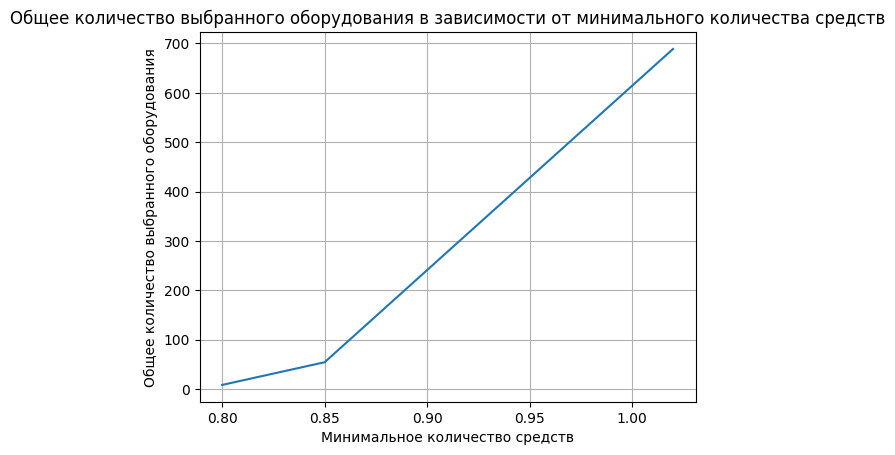

In [5]:
from pulp import *
import matplotlib.pyplot as plt
result = 0
quarters = [
    {"ceh1": 133, "ceh2": 52},
    {"ceh1": 91, "ceh2": 36},
    {"ceh1": 62, "ceh2": 25},
    {"ceh1": 43, "ceh2": 17}
]

for idx, quarter in enumerate(quarters, start=1):
    total = 0.75 * ((60 + 1.3 * (quarter["ceh1"]) ** (2/3)) + (70 + 0.8 * (quarter["ceh2"]) ** (2/3)))
    result += total

def optimize_equipment(cost_constraint_coefficient):
    prob = LpProblem("Optimal_equipment", LpMaximize)

    x1 = LpVariable("x1", lowBound=0, cat='Integer')
    x2 = LpVariable("x2", lowBound=0, cat='Integer')
    x3 = LpVariable("x3", lowBound=0, cat='Integer')
    x4 = LpVariable("x4", lowBound=0, cat='Integer')
    x5 = LpVariable("x5", lowBound=0, cat='Integer')

    prob += 1400*x1 + 900*x2 + 1000*x3 + 900*x4 + 1600*x5, "Total Productivity"

    prob += 39*x1 + 38*x2 + 29*x3 + 57*x4 + 49*x5 <= int(result * cost_constraint_coefficient), "Cost Constraint"
    prob += 23*x1 + 21*x2 + 27*x3 + 8*x4 + 20*x5 <= 180, "Area Constraint"

    prob.solve()
    return prob

def find_optimal_ranges():
    optimal_ranges = []
    equipment_selections = []

    min_funds = None
    max_funds = None

    for cost_coefficient in range(80, 161, 1):
        optimized_prob = optimize_equipment(cost_coefficient/100)
        selected_equipment = {v.name: int(v.varValue) for v in optimized_prob.variables() if v.varValue > 0}

        if len(selected_equipment) >= 2:
            if min_funds is None:
                min_funds = cost_coefficient / 100
            max_funds = cost_coefficient / 100

            equipment_selections.append(selected_equipment)
        else:
            if min_funds is not None:
                optimal_ranges.append((min_funds, max_funds, equipment_selections))
                min_funds = None
                max_funds = None
                equipment_selections = []

    if min_funds is not None:
        optimal_ranges.append((min_funds, max_funds, equipment_selections))

    return optimal_ranges

optimal_ranges = find_optimal_ranges()

print("Промежутки количества средств, для которых оптимальным будет выбор двух и более типов оборудования:")
for r in optimal_ranges:
    print(f"Минимальное количество средств: {int(r[0] * result)} млн.руб")
    print(f"Максимальное количество средств: {int(r[1] * result)} млн.руб")
    print("Выбранные типы оборудования и количество штук:")
    for selection in r[2]:
        print(", ".join([f"Тип {equipment}: {quantity} шт|" for equipment, quantity in selection.items()]))
    print()

min_funds_values = [r[0] for r in optimal_ranges]
num_selected_equipment = [sum([quantity for selection in r[2] for quantity in selection.values()]) for r in optimal_ranges]

plt.plot(min_funds_values, num_selected_equipment)
plt.xlabel('Минимальное количество средств')
plt.ylabel('Общее количество выбранного оборудования')
plt.title('Общее количество выбранного оборудования в зависимости от минимального количества средств')
plt.grid(True)
plt.show()


## ***Вывод***


***Интерпретируя результат оптимизации нашей задачи:***

- Можно придти к выводу, что приобретение оборудования только пятого типа суммарно обеспечивает максимальную производительность третьего цеха.
- Другие типы оборудования (первого, второго, третьего и четвертого типов) не требуются, чтобы достичь этой максимальной производительности, поэтому их количество остается равным нулю.

Это означает, что оптимальным решением для вашей задачи будет приобретение только оборудования пятого типа в количестве 9 единиц.

***Влияние изменения (увеличения, уменьшения) количества средств на переход роли активного ограничения (либо по площади, либо по стоимости), и вследствие этого — на выбор оптимального типа оборудования:***

- Например, При увеличении ограничения по площади с 180 до 346, происходит сдвиг с использования оборудования типа $x_5$ к использованию оборудования типа $x_1$ и $x_3$, что увеличивает производительность до 17200.

Таким образом, изменение количества средств на переход роли активного ограничения по площади влияет на выбор оптимального типа оборудования и производительность производственного процесса и при этом,чтобы осталось как можно меньше денег и ограничение по деньгам стало активным.

***Выяснить границы изменения количества средств, в пределах которых оптимальным является выбор 2-х и более типов оборудования.***

- Можно сделать вывод, что для выбора двух и более типов оборудования оптимальными значениями количества средств являются от 389 млн.руб до 778 млн.руб. Для каждого конкретного количества средств в этом диапазоне представлены сочетания типов оборудования и их количество, которые обеспечивают оптимальное решение задачи. Например, при 413 млн.руб средств оптимальным является сочетание 4 шт. оборудования типа x1, 1 шт. оборудования типа x4 и 4 шт. оборудования типа x5.

Таким образом, можно использовать данные промежутки количества средств и сочетания типов оборудования для оптимального планирования закупок и распределения ресурсов в рамках данной задачи.
